# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Consolidated Answers

### All relevant code and graphs are displayed below this section.

\#1. The sample appears to be approximately normal based on the plotted histogram and Q-Q plots, as well as the result given by the Shapiro-Wilk test, all shown below.

\#2. As indicated above, the sample size is 130.   One individual's body temperature should not affect another's, so the observations in the sample may be said to be independent.  The number of observations is also greater than 30 and so the Central Limit Theorem may still apply such that the means of the sample have an approximately normal distribution.  

\#3a. __Bootstrap Approach__ 

We reject the null hypothesis that the average temperature is 98.6 degrees since the average observed value shown above is approximately 98.2 degrees, even less than the minimum bootstrap value of approximately 98.4 degrees.   

\#3b. __Frequentist testing__  

We use a one-sample test here since we only have one set of data to compare to the general population. We will use a t-test here since the true standard deviation of the general population is unknown. 

The p-value given by the ttest_onesamp function (2.4106320415561318e-07) is substantially lower than the threshold $\alpha$ of 0.05.  This further shows that the null hypothesis should be rejected.

The test value for the ztest function performed by hand (-5.4548232923645195) is the same as that for the t-test, likely because this function is presuming the sample standard deviation is the same as the population's. (We do not have the general population's standard deviation.) The p-value generated is even smaller, but may not be as trustworthy since the function is not using the correct standard deviation for a z-test. The value calculated by hand, again using the sample standard deviation instead, is close to the ttest function's test value as well at -5.4759252020781162. Looking this value up on a z-table for extreme negative z-scores (available [here](http://wserver.crc.losrios.edu/~larsenl/ExtraMaterials/tables_ZTXF.pdf)) gives a p-value of less than approximately .0001. Thus, using either test we are able to reject the null hypothesis.  

\#4. __Small Sample__  

Although this sample is less than 30, it still retains an approximately normal form as seen in the histogram and Shapiro test below.

The p-value is approx. .28 based on the z-test, very close to the p-value in the t-test. Since we are basing the population here on the sample of 130 that we drew the smaller sample from, the z-test is appropriate here.

\#5. __Abnormal Values__

Using a bootstrapping approach we obtain results stating:
Abnormal if greater than  98.3363178885  degrees or less than  98.1167590345  degrees.

Using a somewhat more approximate method taking values greater than 2 standard errors from the mean to be extreme values we obtain similar results stating:
Abnormal if greater than  98.3773439986  degrees or less than  98.1211175398  degrees.

\#6. __Gender Temperature Differences__

Males have a slightly lower average temperature according to the present observations.

Assuming an $\alpha$ of 0.05, the p-value given by the t-test (0.0239318831224) is less than $\alpha$ and indicates that the null hypothesis that there is no difference in mean temperature between males and females should be rejected. The observed difference was approximately 0.29 degrees, with females having the slightly higher mean temperature. 

To obtain the foregoing result I used a two-sample boot strapping method as an initial test method since we now have two groups within the initial sample to compare, each with their own separate means.  The two-sample t-test was then used since the size of both male and female samples was greater than 30 (both are 65), the population standard deviation remains unknown and the two samples are independent (male and female temperatures were not paired or matched, and no individual's body temperature should affect another's). 

The goal was to determine whether the difference in means observed was likely due to chance.  The rejection of the null hypothesis here shows that it was very unlikely that the observed difference was due to chance.  

As indicated below, both the average male temperature and the average female temperature were both below 98.6 degrees, lending further credence to the possibility that the standard 98.6 degree average reported by Wunderlich is incorrect.


In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#View characteristics of dataset
df.info()

#Get mean temperature
print("\n Average temperature: ", np.mean(df['temperature']))

#Get statistical data concerning the set
df['temperature'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB

 Average temperature:  98.24923076923078


count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

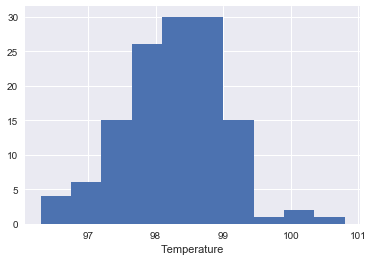

In [3]:
#1. Plot temperature to view if normal--appears roughly normal. 
_ = plt.hist(df['temperature'])

_ = plt.xlabel("Temperature")

plt.show()


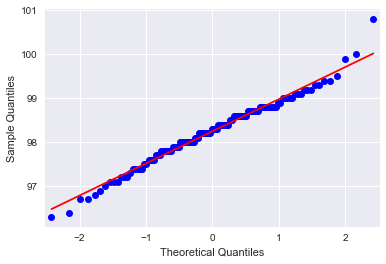

In [5]:
#Q-Q Plot also indicates approximate normality

import statsmodels.api as sm

sm.qqplot(df['temperature'], line='s')
plt.show()

In [6]:
#Apply Shapiro-Wilk test of normality
from scipy.stats import shapiro

stat, p = shapiro(df['temperature'])

alpha = 0.05

if p > alpha:
    print("p is", p,". Sample appears normal.")
    
else:
    print("p is", p,". Sample is not normal.")

p is 0.233174666762352 . Sample appears normal.


1. The sample appears to be approximately normal.

2. As indicated above, the sample size is 130.   One individual's body temperature should not affect another's, so the observations in the sample may be said to be independent.  The number of observations is also greater than 30 and so the Central Limit Theorem may still apply such that the means of the sample have an approximately normal distribution.  

In [7]:
#3a.  Bootstrap test for mean
np.random.seed(7)

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

translated_temp = df['temperature'] - np.mean(df['temperature']) + 98.6

bs_replicates = draw_bs_reps(translated_temp, np.mean, size=10000)

a = .05

#Use lower and upper bounds of difference from 98.6.  Mean itself is .4 below 98.6 and 99.0 is .4 above.
#P value is looking for probability of obeserving values at least as extreme as what was observed by chance.
p = (np.sum(bs_replicates <= np.mean(df['temperature'])) + np.sum(bs_replicates >= 99.0)) / 10000

print("p = ", p)

if p < a:
    print("Reject null hypothesis.  General population may have different temperature.")
else:
    print("Fail to reject null hypothesis. General population's temperature is likely 98.6.")
    

p =  0.0
Reject null hypothesis.  General population may have different temperature.


In [8]:
print("Average temperature observed: ", np.mean(df['temperature']))
print("Minimum bootstrap value: ", bs_replicates.min())

Average temperature observed:  98.24923076923078
Minimum bootstrap value:  98.3792307692


3a. We reject the null hypothesis that the average temperature is 98.6 degrees since the average observed value shown above is approximately 98.2 degrees, even less than the minimum bootstrap value of approximately 98.4 degrees.   

3b. __Frequentist testing__.  We use a one-sample test here since we only have one set of data to compare to the general population. We will use a t-test here since the true standard deviation of the general population is unknown. 

In [9]:
#Use ttest_onesamp to calulate p-value from t-test
from scipy.stats.mstats import ttest_onesamp

ttest_onesamp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561318e-07)

The p-value given by the ttest_onesamp function (2.4106320415561318e-07) is substantially lower than the threshold $\alpha$ of 0.05.  This further shows that the null hypothesis should be rejected.

In [10]:
#Performing z-test by ztest function
from statsmodels.stats.weightstats import ztest

zstat, pval = ztest(df['temperature'], value=98.6, alternative="two-sided")

print("The z-statistic is", zstat, " and the p-value is", pval, ".")


The z-statistic is -5.45482329236  and the p-value is 4.9021570141e-08 .


In [11]:
#Performing z-test by hand
(np.mean(df['temperature']) - 98.6)/(np.std(df['temperature'])/np.sqrt(len(df)))

-5.4759252020781162

The test value for the ztest function performed by hand (-5.4548232923645195) is the same as that for the t-test, likely because this function is presuming the sample standard deviation is the same as the population's. (We do not have the general population's standard deviation.) The p-value generated is even smaller, but may not be as trustworthy since the function is not using the correct standard deviation for a z-test. The value calculated by hand, again using the sample standard deviation instead, is close to the ttest function's test value as well at -5.4759252020781162. Looking this value up on a z-table for extreme negative z-scores (available [here](http://wserver.crc.losrios.edu/~larsenl/ExtraMaterials/tables_ZTXF.pdf)) gives a p-value of less than approximately .0001. Thus, using either test we are able to reject the null hypothesis.  

In [12]:
#4. Small sample
np.random.seed(7)
small_sample = np.random.choice(df['temperature'], size=10)

#T-Test
ttest_onesamp(small_sample, 98.6)

Ttest_1sampResult(statistic=-1.0774675665588005, pvalue=0.30930267921950938)

Although this sample is less than 30, it still retains an approximately normal form as seen in the histogram and Shapiro test below.

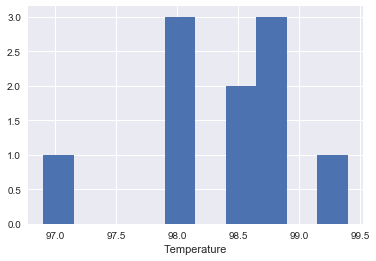

p is 0.42676687240600586 . Sample appears normal.


In [13]:
_ = plt.hist(small_sample)

_ = plt.xlabel("Temperature")

plt.show()

stat, p = shapiro(small_sample)

alpha = 0.05

if p > alpha:
    print("p is", p,". Sample appears normal.")
    
else:
    print("p is", p,". Sample is not normal.")

In [14]:
#Z-Test

zstat, p = ztest(small_sample, value=98.6, alternative="two-sided")

#zscore = (np.mean(small_sample) - 98.6)/(np.std(df['temperature'])/np.sqrt(10))

print("P-value is ", p)

P-value is  0.281271432868


The p-value is approx. .28 based on the z-test, very close to the p-value in the t-test. Since we are basing the population here on the sample of 130 that we drew the smaller sample from, the z-test is appropriate here.

In [15]:
#5. Unusual values
#Bootstrapping approach

from scipy import stats
np.random.seed(7)

z_critical = stats.norm.ppf(q = 0.975)
margin_of_error = z_critical * (np.std(df['temperature'])/np.sqrt(len(df)))

confidence_interval = (draw_bs_reps(df['temperature'], np.mean, size=1)[0] - margin_of_error,
                       draw_bs_reps(df['temperature'], np.mean, size=1)[0] + margin_of_error)

print("Abnormal if greater than ", confidence_interval[1], " degrees or less than ", confidence_interval[0], " degrees.")


Abnormal if greater than  98.3363178885  degrees or less than  98.1167590345  degrees.


In [16]:
#Method using greater than 2 standard errors as being abnormal/extreme yields similar results

difference = 2 * np.std(df['temperature'])/np.sqrt(len(df['temperature']))

upper_temp = np.mean(df['temperature']) + difference
lower_temp = np.mean(df['temperature']) - difference

print("Abnormal if greater than ", upper_temp, " degrees or less than ", lower_temp, " degrees.")


Abnormal if greater than  98.3773439986  degrees or less than  98.1211175398  degrees.


In [17]:
#6. Difference in temperature by gender observed
df.groupby('gender')['temperature'].mean()

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

Males have a slightly lower average temperature according to the present observations.  

In [18]:
#Bootstrap approach
#Set seed
np.random.seed(7)

#Get male and female temperatures to bootstrap.
male_temp = df.loc[df['gender'] == "M"]['temperature']
female_temp = df.loc[df['gender'] == "F"]['temperature']

mean_temp = np.mean(df['temperature'])

mean_male_temp = np.mean(male_temp)
mean_female_temp = np.mean(female_temp)

empirical_diff_means =  mean_female_temp - mean_male_temp

# Generate shifted arrays
male_temp_shifted = male_temp - np.mean(male_temp) + mean_temp
female_temp_shifted = female_temp - np.mean(female_temp) + mean_temp 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_male = draw_bs_reps(male_temp_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female_temp_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_female - bs_replicates_male

# Compute and print p-value: p 
#Use alternative hypothesis that male and female temperature means are greater than or equal to that observed. 
p = (np.sum(bs_replicates >= empirical_diff_means)) / 10000
print('p-value =', p)

if p < a:
    print("Reject null hypothesis.  Males and females may have a different mean temperature.")
else:
    print("Fail to reject null hypothesis. Males and females likely have the same mean temperature.")
    

p-value = 0.0113
Reject null hypothesis.  Males and females may have a different mean temperature.


In [19]:
#Alternative approach using ttest_ind for two samples
from scipy import stats

print("Male sample size: ", len(male_temp), " Female sample size: ", len(female_temp))

stat, p = stats.ttest_ind(male_temp, female_temp)

print('p-value =', p)

if p < a:
    print("Reject null hypothesis.  Males and females may have a different mean temperature.")
else:
    print("Fail to reject null hypothesis. Males and females likely have the same mean temperature.")
  

Male sample size:  65  Female sample size:  65
p-value = 0.0239318831224
Reject null hypothesis.  Males and females may have a different mean temperature.


Assuming an $\alpha$ of 0.05, the p-value given by the t-test (0.0239318831224) is less than $\alpha$ and indicates that the null hypothesis that there is no difference in mean temperature between males and females should be rejected. The observed difference was approximately 0.29 degrees, with females having the slightly higher mean temperature. 

To obtain the foregoing result I used a two-sample boot strapping method as an initial test method since we now have two groups within the initial sample to compare, each with their own separate means.  The two-sample t-test was then used since the size of both male and female samples was greater than 30 (both are 65), the population standard deviation remains unknown and the two samples are independent (male and female temperatures were not paired or matched, and no individual's body temperature should affect another's). 

The goal was to determine whether the difference in means observed was likely due to chance.  The rejection of the null hypothesis here shows that it was very unlikely that the observed difference was due to chance.  

As indicated above, both the average male temperature and the average female temperature were both below 98.6 degrees, lending further credence to the possibility that the standard 98.6 degree average reported by Wunderlich is incorrect.
